In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

### Illustration of features matrix and target array

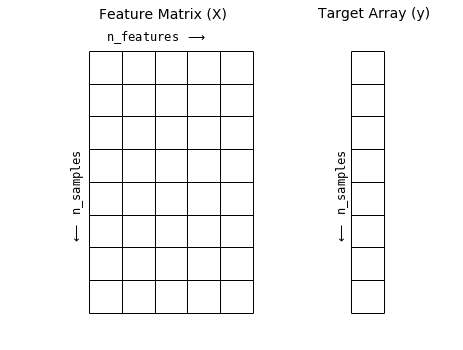

In [47]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')    # remove boarder
ax.axis('equal')  # equal grid

# Draw features matrix
ax.vlines(range(6), ymin=0, ymax=8, lw=1)
ax.hlines(range(9), xmin=0, xmax=5, lw=1)
font_prop = dict(size=12, family='monospace')
ax.text(0.3, 9, "Feature Matrix (X)", size=14)
ax.text(0.5, 8.3, 'n_features $\longrightarrow$', **font_prop)
ax.text(-0.1, 5, '$\longleftarrow$ n_samples', rotation=90,
        va='top', ha='right', **font_prop)

# Draw labels vector
ax.vlines(range(8, 10), ymin=0, ymax=8, lw=1)
ax.hlines(range(9), xmin=8, xmax=9, lw=1)
ax.text(7, 9, "Target Array (y)", size=14)
ax.text(8, 5, r'$\longleftarrow$ n_samples', rotation=90,
        va='top', ha='right', **font_prop);

fig.savefig('img/features_target.png', bbox_inches="tight")